## Task 1: Exploratory Data Analysis (EDA) and Business Insights
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")
customers = pd.read_csv("Customers.csv")

In [6]:
print(transactions.head(5))

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [8]:
print((customers).head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [5]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [37]:
print(customers['SignupDate'])

0     2022-07-10
1     2022-02-13
2     2024-03-07
3     2022-10-09
4     2022-08-15
         ...    
195   2022-06-07
196   2023-03-21
197   2022-02-27
198   2022-12-03
199   2023-06-11
Name: SignupDate, Length: 200, dtype: datetime64[ns]


In [35]:
print(transactions['TransactionDate'] )

0     2024-08-25 12:38:23
1     2024-05-27 22:23:54
2     2024-04-25 07:38:55
3     2024-03-26 22:55:37
4     2024-03-21 15:10:10
              ...        
995   2024-10-24 08:30:27
996   2024-06-04 02:15:24
997   2024-04-05 13:05:32
998   2024-09-29 10:16:02
999   2024-04-21 10:52:24
Name: TransactionDate, Length: 1000, dtype: datetime64[ns]


In [6]:
merged_data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')


In [7]:
print("Merged Dataset:")
print(merged_data.head(), "\n")

Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region SignupDate  
0   Andrea Jenkins         Eu

In [8]:
top_products_by_quantity = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products_by_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

In [9]:
print("Top Products by Quantity:")
print(top_products_by_quantity, "\n")
print("Top Products by Revenue:")
print(top_products_by_revenue, "\n")

Top Products by Quantity:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64 

Top Products by Revenue:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64 



In [10]:
customers_per_region = customers['Region'].value_counts()

In [11]:
print("Customers by Region:")
print(customers_per_region, "\n")

Customers by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64 



In [12]:
popular_categories = merged_data['Category'].value_counts()

In [13]:
print("Popular Product Categories:")
print(popular_categories, "\n")

Popular Product Categories:
Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64 



In [14]:
transactions_per_month = merged_data['TransactionDate'].dt.to_period('M').value_counts().sort_index()


In [15]:
print("Transactions Over Time:")
print(transactions_per_month, "\n")

Transactions Over Time:
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64 



In [16]:

avg_revenue_per_customer = merged_data.groupby('CustomerID')['TotalValue'].sum().mean()


In [17]:
print(f"Average Revenue Per Customer: ${avg_revenue_per_customer:.2f}\n")

Average Revenue Per Customer: $3467.31



Text(0, 0.5, 'Quantity Sold')

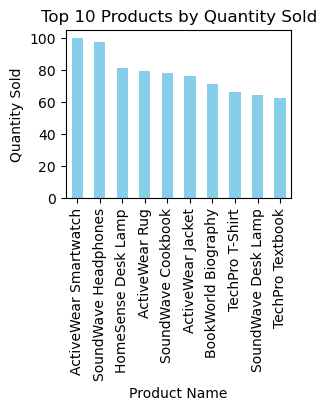

In [18]:
# Plot 1: Top-selling products by quantity
plt.subplot(2, 2, 1)
top_products_by_quantity.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

Text(0, 0.5, 'Number of Transactions')

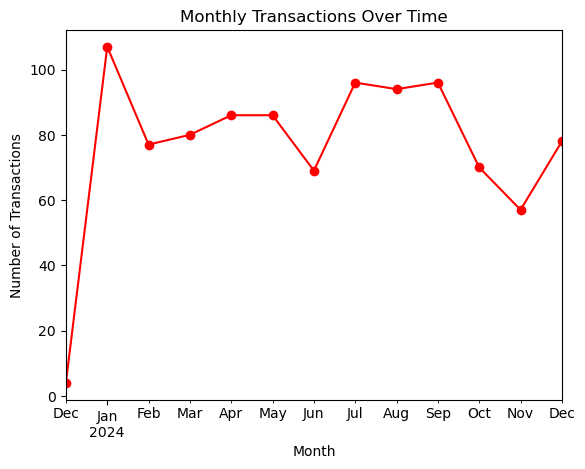

In [23]:
# Plot 2: Transactions over time
plt.subplot(1, 1, 1)
transactions_per_month.plot(kind='line', marker='o', color='red')
plt.title('Monthly Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

Text(0, 0.5, '')

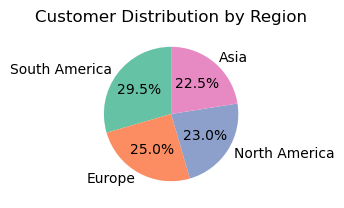

In [24]:
# Plot 3: Customer distribution by region
plt.subplot(2, 2, 3)
customers_per_region.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Customer Distribution by Region')
plt.ylabel('')

Text(0, 0.5, 'Number of Sales')

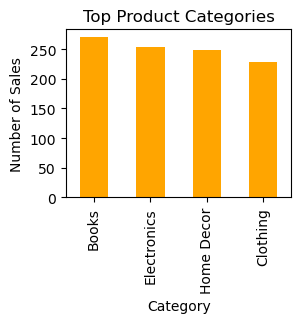

In [29]:
# Plot 4: Popular product categories
plt.subplot(2, 2, 4)
popular_categories.plot(kind='bar', color='orange')
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Sales')

## Insights:

## 1] Top-Selling Products: "ActiveWear Smartwatch" leads with 100 units sold, generating $39,097, followed by "SoundWave Headphones" (97 units, $25,212).

## 2] Regional Distribution: South America has the highest customer base (59 customers), followed by Europe (50).

## 3] Popular Categories: Books are the most popular category with 270 sales, followed by Electronics (254).

## 4] Monthly Transactions: Transactions peak in certain months, likely during promotional events, emphasizing the need for targeted campaigns.

## 5] Customer Revenue: Each customer generates an average of $3,467 in revenue, highlighting the potential for increasing lifetime value.